In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset (ensure you have the correct path to the file)
df = pd.read_csv("dataset/creditcard.csv")

In [3]:
# Display the first few rows of the dataframe
print(df.head())

# Get a concise summary of the dataframe
print(df.info())

# Descriptive statistics for each column
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Check for missing values in each column
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


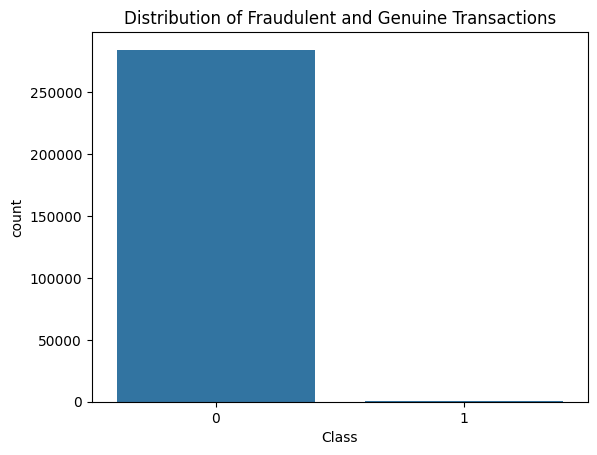

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of fraud and no fraud cases
print(df['Class'].value_counts())

# Plot the distribution of fraud vs. non-fraud transactions
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Genuine Transactions')
plt.show()

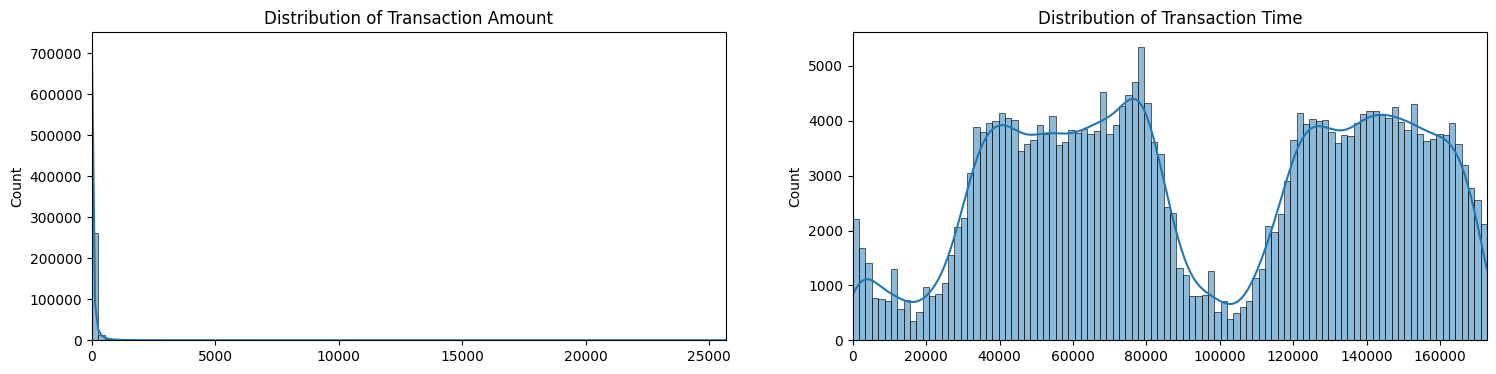

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], bins=100, kde=True)
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], bins=100, kde=True)
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


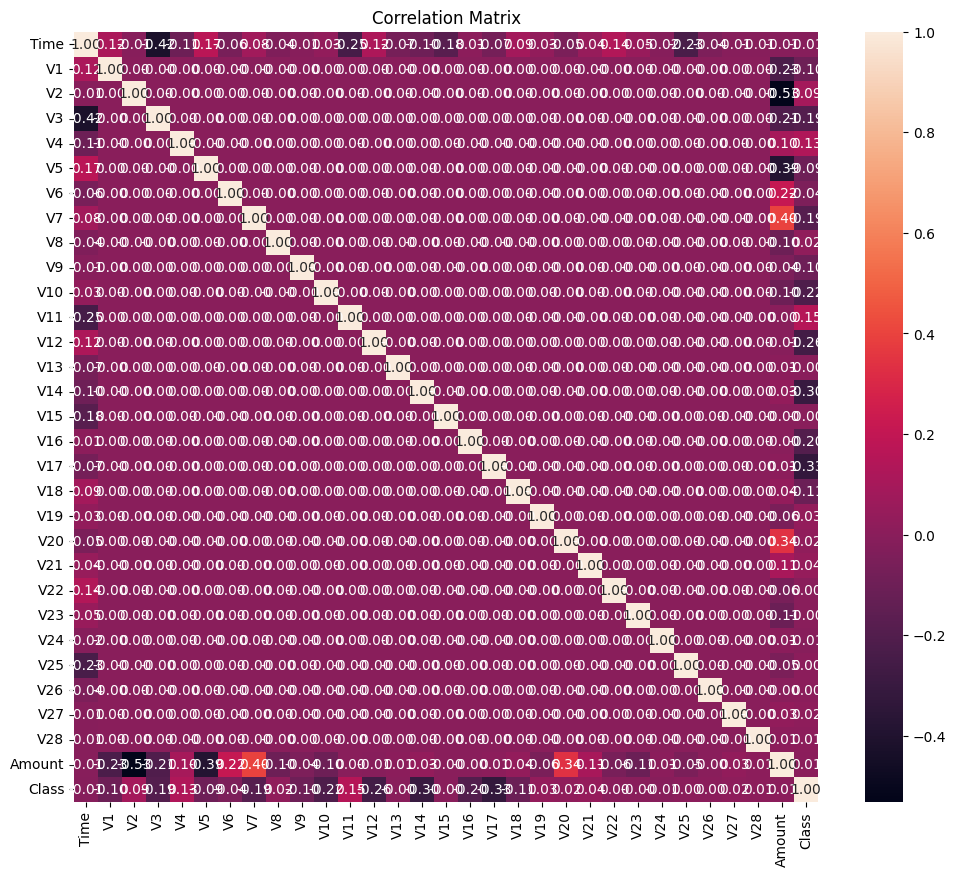

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Data Preprocessing Functions
def manual_split(X, y, test_size=1 / 3):
    np.random.seed(42)  # For reproducibility
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [9]:
def manual_scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [10]:
# Evaluation Metrics
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [11]:
def precision_recall_f1(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [12]:
X = df.drop("Class", axis=1).values
y = df["Class"].values

In [13]:
# Preprocess the data
X_scaled = manual_scale(X)
X_train, X_test, y_train, y_test = manual_split(X_scaled, y)

In [14]:
# SVM Implementation
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

In [15]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = len(y)
        h = self.sigmoid(X.dot(self.theta))
        epsilon = 1e-5  # to prevent log(0)
        regularization = (self.lambda_ / (2 * m)) * np.sum(np.square(self.theta[1:]))
        cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) + regularization
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        for _ in range(self.iterations):
            h = self.sigmoid(X.dot(self.theta))
            gradient = np.dot(X.T, (h - y)) / m
            gradient[1:] += (self.lambda_ / m) * self.theta[1:]  # Regularization for j >= 1
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)

In [16]:
# Logistic Regression Model Training and Evaluation
model_lr = LogisticRegression(learning_rate=0.1, iterations=3000, lambda_=0.1)
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
accuracy_lr = np.mean(predictions_lr == y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

Logistic Regression Accuracy: 99.87%


In [17]:
# SVM Model Training and Evaluation
svm = LinearSVM()
svm.fit(X_train, y_train)
predictions_svm = svm.predict(X_test)
predictions_svm = np.where(predictions_svm < 0, 0, 1)
print(f"SVM Accuracy: {accuracy(y_test, predictions_svm)}")
precision, recall, f1 = precision_recall_f1(y_test, predictions_svm)
print(f"SVM Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

SVM Accuracy: 0.9994838573760995
SVM Precision: 0.852112676056338, Recall: 0.8120805369127517, F1-Score: 0.8316151202749141
